## 환경 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

**주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [2]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

-------------

# 데이터 불러오기 
- 데이터가 크다보니 속도가 오래걸리기도 합니다..!
- 아직 이런 문제를 해결하는 방법에 대한 에듀세션을 배우지 않았으니,
- 각자의 컴퓨터가 감당할 수 있는 만큼, 그리고 지금껏 에듀세션에서 배운 내용으로 최대한 성능개선을 해보시되, 
- 절대적인 accuracy 수치에 대해 부담은 갖지 않으셔도 됩니다! 몇 %라도 개선되었다면 좋습니다 ㅎㅎ

In [3]:
# 데이터 불러오기 
df = pd.read_csv('NYC_taxi_extra_info.csv')

df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
df['zip_code'] = df['zip_code'].astype(str) 

## 날짜 줄이기 
# df = df.iloc[0:7000, :]  #7000개만 남기기 

## 지역 수 줄이기 
## 더 많은 지역을 포함해도 됩니다! 컴퓨터가 버틸 수 있을 만큼만..! 
# zip_code_list = ['10001', '10002', '10115', '10026', '10027', '10029', '10030', '11797', '11801']
# df = df[df.zip_code.isin(zip_code_list)]
# df = df.reset_index()
# df = df.drop(['index'], axis = 1)

0시와 23시는 1시간밖에 차이나지 않지만, 컴퓨터에서는 이를 인식하지 못한다는 문제가 있음. <br>
- sin/cos으로 encoding 처리.
- weekday에 대해서도 동일한 문제가 발생하여 동일한 처리

In [4]:
df['weekday_sin']=np.sin(2*np.pi*df.weekday/7)
df['weekday_cos']=np.cos(2*np.pi*df.weekday/7)
df['hour_sin']=np.sin(2*np.pi*df.hour/24)
df['hour_cos']=np.cos(2*np.pi*df.hour/24)

In [5]:
df.head(3)

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt,lat,lon,...,wind_y,is_raining,is_snowing,is_cloudy,is_clear,weather_strength,weekday_sin,weekday_cos,hour_sin,hour_cos
0,11106,2015-01-01,1,1,3,0,1,75,40.761229,-73.929593,...,-0.93358,0,0,0,1,0,0.433884,-0.900969,0.0,1.0
1,10006,2015-01-01,1,1,3,0,1,64,40.708312,-74.013440,...,-0.93358,0,0,0,1,0,0.433884,-0.900969,0.0,1.0
2,11201,2015-01-01,1,1,3,0,1,169,40.692500,-73.991763,...,-0.93358,0,0,0,1,0,0.433884,-0.900969,0.0,1.0


# 데이터 전처리 
### (전처리 파일을 복붙해오시고, 모델별로 다르게 적용하실때마다 복붙해서 사용하시면 되겠습니다) 

### 모델링을 위한 기본 전처리
  - `기본 정보 확인 (결측치 및 이상치 처리)`
      - df.info()
      - df.describe()
      - 간단한 시각화 
  - `시간 관련 전처리 (새로운 열 생성)` 
      - DATETIME에서 MONTH, HOUR, WEEKDAY 등 추출
  - `Categorical 데이터 전처리`
      - One Hot Encoding
      - Label Encoding
  - `Train / Test Split`
    - NY taxi data에서 주의점 

### 기본 정보 확인 (결측치 및 이상치 처리) 
  - df.info()
  - df.describe()
  - 간단한 시각화 



---


EDA 과정에서 기본적으로 다 확인하셨죠? ㅎㅎ 
EDA 결과 중 모델링에 적용하기로한 부분이 있다면 반영해주세요~!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   zip_code          87020 non-null  object        
 1   pickup_hour       87020 non-null  datetime64[ns]
 2   month             87020 non-null  int64         
 3   day               87020 non-null  int64         
 4   weekday           87020 non-null  int64         
 5   hour              87020 non-null  int64         
 6   is_weekend        87020 non-null  int64         
 7   cnt               87020 non-null  int64         
 8   lat               87020 non-null  float64       
 9   lon               87020 non-null  float64       
 10  temp              87020 non-null  float64       
 11  humid             87020 non-null  float64       
 12  pressure          87020 non-null  float64       
 13  wind_direction    87020 non-null  float64       
 14  wind_speed        8702

### `Categorical 데이터 전처리`

기본적으로 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허락하지 않습니다. 또한, 먆은 알고리즘이 범주형 데이터로 직접 작동할 수 없습니다. 그렇기 때문에 모든 문자열 값들을 숫자 형으로 인코딩하는 전처리 작업 후에 머신러닝 모델에 학습을 시켜야하는데요. 이렇게 인코딩 하는 방식에는 크게 레이블 인코딩(Lable encoding)과 원-핫 인코딩(One Hot Encoding)이 있습니다. 

- One Hot Encoding

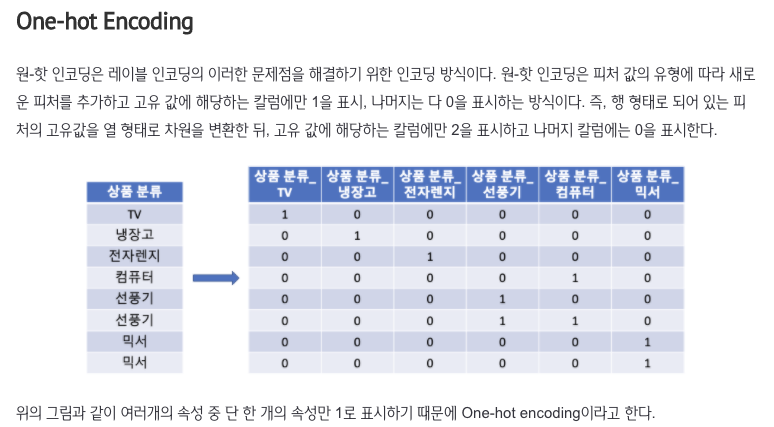

### Train and Test Split
- 시계열 데이터는 Random Sampling을 하면 안됨
- Train엔 과거 데이터, Test엔 (과거 대비) 미래 데이터가 있어야 함
    - 만약 Train에 미래 데이터가 있다면? 미래를 보고 과거를 예측한 꼴
    - 실제로 사용할 땐 과거 데이터 기반으로 미래 데이터를 예측

In [6]:
# 지정해준 date를 기점으로 train과 test set을 split
def split_train_and_test(df, date):
    """
    Dataframe에서 train_df, test_df로 나눠주는 함수
    
    df : 시계열 데이터 프레임
    date : 기준점 날짜
    """
    train_df = df[df['pickup_hour'] < date]
    test_df = df[df['pickup_hour'] >= date]
    return train_df, test_df

- 위의 방식처럼 명시적으로 date를 지정하는 방법이 마음에 들지 않을수도 있음
    - 이럴 경우 Dataframe의 시간 데이터를 마지막 1주치만 Test로 지정할 수 있음

In [7]:
def split_train_and_test_period(df, period):
    """
    Dataframe에서 train_df, test_df로 나눠주는 함수
    
    df : 시계열 데이터 프레임
    period : train/test 기준 일
    """
    criteria = (max(df['pickup_hour']) - pd.Timedelta(days=period)).date()
    train_df = df[df['pickup_hour'] < criteria]
    test_df = df[df['pickup_hour'] >= criteria]
    return train_df, test_df

### Train / Test 나누기

In [8]:
# 그 전에 필요없는 feature('pickup_hour 제외') 삭제
del df['zip_code']        # one hot encoding 해서 더는 필요 없음
del df['month']           # 전부 1월 데이터이기 때문에 month가 의미 없음
del df['wind_direction']  # wind_x, wind_y로 feature 가공해주었기 때문에 필요 x
del df['des']             # one hot encoding 해서 더 이상 필요 없음
del df['hour']            # sin, cos encoding 해줘서 더 이상 필요 없음
del df['weekday']         # sin, cos encoding 해줘서 더 이상 필요 없음
del df['is_raining']
del df['is_snowing']
del df['is_cloudy']
del df['is_clear']
# del train_df['zip_code_le']
# del test_df['zip_code_le']

In [9]:
train_df, test_df = split_train_and_test(df, '2015-01-24') # 원핫인코딩

In [10]:
train_df

,pickup_hour,day,is_weekend,cnt,lat,lon,temp,humid,pressure,wind_speed,wind_x,wind_y,weather_strength,weekday_sin,weekday_cos,hour_sin,hour_cos
0,2015-01-01 00:00:00,1,1,75,40.761229,-73.929593,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
1,2015-01-01 00:00:00,1,1,64,40.708312,-74.013440,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
2,2015-01-01 00:00:00,1,1,169,40.692500,-73.991763,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
3,2015-01-01 00:00:00,1,1,222,40.653199,-73.784133,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
4,2015-01-01 00:00:00,1,1,64,40.837391,-73.941015,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65113,2015-01-23 23:00:00,23,0,7,40.645926,-73.955015,-2.989,90.0,1020.0,2.0,-0.754710,-0.656059,3,-0.433884,-0.900969,-0.258819,0.965926
65114,2015-01-23 23:00:00,23,0,12,40.837391,-73.941015,-2.989,90.0,1020.0,2.0,-0.754710,-0.656059,3,-0.433884,-0.900969,-0.258819,0.965926
65115,2015-01-23 23:00:00,23,0,4,40.748088,-73.860623,-2.989,90.0,1020.0,2.0,-0.754710,-0.656059,3,-0.433884,-0.900969,-0.258819,0.965926
65116,2015-01-23 23:00:00,23,0,2,41.011504,-73.751870,-2.989,90.0,1020.0,2.0,-0.754710,-0.656059,3,-0.433884,-0.900969,-0.258819,0.965926


In [11]:
test_df

,pickup_hour,day,is_weekend,cnt,lat,lon,temp,humid,pressure,wind_speed,wind_x,wind_y,weather_strength,weekday_sin,weekday_cos,hour_sin,hour_cos
65118,2015-01-24 00:00:00,24,1,17,40.690901,-73.928318,-3.020823,90.0,1019.0,2.0,-0.766044,-0.642788,3,-0.974928,-0.222521,0.000000,1.000000
65119,2015-01-24 00:00:00,24,1,306,40.653199,-73.784133,-3.020823,90.0,1019.0,2.0,-0.766044,-0.642788,3,-0.974928,-0.222521,0.000000,1.000000
65120,2015-01-24 00:00:00,24,1,3,40.724009,-73.900127,-3.020823,90.0,1019.0,2.0,-0.766044,-0.642788,3,-0.974928,-0.222521,0.000000,1.000000
65121,2015-01-24 00:00:00,24,1,28,40.680521,-73.949349,-3.020823,90.0,1019.0,2.0,-0.766044,-0.642788,3,-0.974928,-0.222521,0.000000,1.000000
65122,2015-01-24 00:00:00,24,1,472,40.786271,-73.975631,-3.020823,90.0,1019.0,2.0,-0.766044,-0.642788,3,-0.974928,-0.222521,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87015,2015-01-31 23:00:00,31,1,1,40.632650,-73.996601,-6.175519,81.0,1024.0,4.0,0.629320,-0.777146,0,-0.974928,-0.222521,-0.258819,0.965926
87016,2015-01-31 23:00:00,31,1,3,40.829743,-73.908570,-6.175519,81.0,1024.0,4.0,0.629320,-0.777146,0,-0.974928,-0.222521,-0.258819,0.965926
87017,2015-01-31 23:00:00,31,1,1,40.750423,-73.819936,-6.175519,81.0,1024.0,4.0,0.629320,-0.777146,0,-0.974928,-0.222521,-0.258819,0.965926
87018,2015-01-31 23:00:00,31,1,1,40.627427,-73.945651,-6.175519,81.0,1024.0,4.0,0.629320,-0.777146,0,-0.974928,-0.222521,-0.258819,0.965926


In [12]:
del train_df['pickup_hour']
del test_df['pickup_hour']

In [13]:
train_df

,day,is_weekend,cnt,lat,lon,temp,humid,pressure,wind_speed,wind_x,wind_y,weather_strength,weekday_sin,weekday_cos,hour_sin,hour_cos
0,1,1,75,40.761229,-73.929593,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
1,1,1,64,40.708312,-74.013440,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
2,1,1,169,40.692500,-73.991763,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
3,1,1,222,40.653199,-73.784133,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
4,1,1,64,40.837391,-73.941015,-5.100,59.0,1022.0,2.0,-0.358368,-0.933580,0,0.433884,-0.900969,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65113,23,0,7,40.645926,-73.955015,-2.989,90.0,1020.0,2.0,-0.754710,-0.656059,3,-0.433884,-0.900969,-0.258819,0.965926
65114,23,0,12,40.837391,-73.941015,-2.989,90.0,1020.0,2.0,-0.754710,-0.656059,3,-0.433884,-0.900969,-0.258819,0.965926
65115,23,0,4,40.748088,-73.860623,-2.989,90.0,1020.0,2.0,-0.754710,-0.656059,3,-0.433884,-0.900969,-0.258819,0.965926
65116,23,0,2,41.011504,-73.751870,-2.989,90.0,1020.0,2.0,-0.754710,-0.656059,3,-0.433884,-0.900969,-0.258819,0.965926


In [14]:
y_train = train_df.pop('cnt')
x_train = train_df.copy()

In [15]:
y_test = test_df.pop('cnt')
x_test = test_df.copy()

--------------------------------

# 모델링 

- 시계열 데이터에서 k-fold를 시행하기 위해 **TimeSeriesSplit**을 사용하였습니다.
* 참고자료:
https://scikit-learn.org/stable/modules/cross_validation.html  <br>
https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1

In [16]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer

In [17]:
n_splits = 5   # 5-fold를 시행하고자
tscv = TimeSeriesSplit(n_splits)

In [18]:
# 다양한 metric을 계산해서 print하는 함수 정의
def regression_results(true_y, pred_y):
    
    # regression metrics
    MAE = metrics.mean_absolute_error(true_y, pred_y)
    MSE = metrics.mean_squared_error(true_y, pred_y)
    R2 = metrics.r2_score(true_y, pred_y)
    #MSLE = metrics.mean_squared_log_error(true_y, pred_y)
    MAPE = metrics.mean_absolute_percentage_error(true_y, pred_y)
    
    print('MAE: %.3f' % MAE)
    print('MSE: %.3f' % MSE)
    print('RMSE: %.3f' % np.sqrt(MSE))
    print('R2: %.3f' % R2)
    #print('RMSLE: %.3f' % np.sqrt(MSLE))
    print('MAPE: %.3f' % MAPE)

## #1. *Gradient Boosting Regressor*

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

### - *baseline model*

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

# gradient boosting regressor
gbmr = GradientBoostingRegressor(random_state=1023)
gbmr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1023)

In [71]:
# baseline model의 성능
regression_results(y_test, gbmr.predict(x_test))

MAE: 88.186
MSE: 28398.645
RMSE: 168.519
R2: 0.686
MAPE: 10.294


### - *hyperparameter tuning*

In [74]:
# hyperparameter tuning - max_depth

params = {'max_depth': [x for x in range(7, 15)],
         'learning_rate': [0.01, 0.03, 0.05]}

gs_gbr = RandomizedSearchCV(gbmr, params, cv = tscv, scoring='neg_median_absolute_error')
gs_gbr.fit(x_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=GradientBoostingRegressor(random_state=1023),
                   param_distributions={'learning_rate': [0.01, 0.03, 0.05],
                                        'max_depth': [7, 8, 9, 10, 11, 12, 13,
                                                      14]},
                   scoring='neg_median_absolute_error')

In [75]:
# best parameter, best train score 확인
print('best max_depth :', gs_gbr.best_params_['max_depth'])
print('best learning_rate:', gs_gbr.best_params_['learning_rate'])
print("best r2 score: %.3f" % gs_gbr.best_score_)

best max_depth : 10
best learning_rate: 0.05
best r2 score: -6.248


In [77]:
# 성능이 baseline보다 더 좋아졌는지 확인
regression_results(y_test, gs_gbr.predict(x_test))

MAE: 40.012
MSE: 15476.758
RMSE: 124.406
R2: 0.829
MAPE: 2.396


MAE가 88에서 40으로 절반가량 줄었음. 따라서 최종모델을 이로 결정짓고자

### - *최종 모델*

In [78]:
# 새롭게 적합
gbmr_final = GradientBoostingRegressor(max_depth=10, learning_rate=0.05, random_state=1023)
gbmr_final.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=10, random_state=1023)

### - *feature importances*

- 참고: how to visualize feature importanes <br>
https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

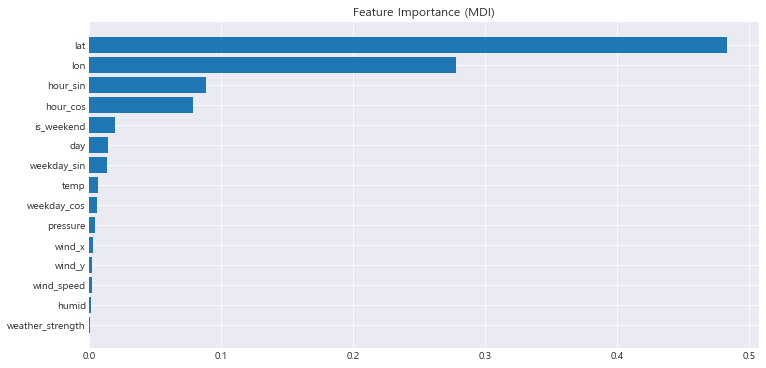

In [79]:
# feature의 중요도 파악
from sklearn.inspection import permutation_importance

feature_importance = gbmr_final.feature_importances_
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_train.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

plt.show()

- lat, lon, 그 뒤로는 hour가 있다.
- 즉, 위치가 중요한데 그 중에서도 경도가 더 큰 영향을 끼친다는 것을 알 수 있었다. <br>
  이는 뉴욕시가 좌우로 넓게 분포해있기 때문이라고 생각된다.

---------------------

## #2. *Light GBM*

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

### - *baseline model*

In [86]:
from lightgbm import LGBMRegressor

# train the LightGBM baseline model
lgbm_base = LGBMRegressor(random_state = 1023)
lgbm_base.fit(x_train, y_train)

LGBMRegressor(random_state=1023)

In [87]:
# baseline model의 성능 확인
regression_results(y_test, lgbm_base.predict(x_test))

MAE: 50.800
MSE: 16118.014
RMSE: 126.957
R2: 0.822
MAPE: 4.413


### - *hyperparameter tuning*

- 참고사이트 : https://smecsm.tistory.com/133
- 최적의 max_depth부터 찾고, 그에 맞춰서 나머지 hyperparameter를 조정해보자!

#### ① max_depth

In [66]:
# hyperparameter tuning - max_depth
lgbmr = LGBMRegressor(random_state=1023)

param = {'max_depth' : [x for x in range(10, 21)]}

depth_gs = GridSearchCV(lgbmr, param, cv=tscv, scoring='neg_median_absolute_error')
depth_gs.fit(x_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(random_state=1023),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20]},
             scoring='neg_median_absolute_error')

In [67]:
# best parameter 확인
print('best max_depth:', depth_gs.best_params_['max_depth'])
print('best r2 score: %.3f' % depth_gs.best_score_)

best max_depth: 17
best r2 score: -11.679


In [68]:
# 그때의 성능 확인
regression_results(y_test, depth_gs.predict(x_test))

MAE: 49.732
MSE: 15792.406
RMSE: 125.668
R2: 0.825
MAPE: 4.124


최적의 max_depth는 17임을 확인. <br>
그에 알맞게 num_leaves를 튜닝해보자.
- 이때 num_leaves를 2^max_depth보다 작게 설정해야 overfitting을 막을 수 있으므로, 대략 범위를 1000에서 2000으로 잡아보자.

#### ② num_leaves

In [25]:
# hyperparameter tuning - num_leaves

param = {'max_depth' : [17],
         'num_leaves' : [x for x in range(1900, 1955, 5)]}

num_leaves_gs = GridSearchCV(lgbmr, param, cv=tscv, scoring='neg_median_absolute_error')
num_leaves_gs.fit(x_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(random_state=1023),
             param_grid={'max_depth': [17],
                         'num_leaves': [1900, 1905, 1910, 1915, 1920, 1925,
                                        1930, 1935, 1940, 1945, 1950]},
             scoring='neg_median_absolute_error')

In [26]:
# 최적의 num_leaves 확인
print('best num_leaves :', num_leaves_gs.best_params_['num_leaves'])
print('best r2 score : %.3f' % num_leaves_gs.best_score_)

best num_leaves : 1920
best r2 score : -6.722


In [27]:
# 그때의 성능 확인
regression_results(y_test, num_leaves_gs.predict(x_test))

MAE: 39.120
MSE: 15724.602
RMSE: 125.398
R2: 0.826
MAPE: 2.273


#### ③ min_child_samples

In [105]:
# hyperparameter tuning - min_child_samples
param = {'max_depth' : [17],
        'num_leaves' : [1920],
        'min_child_samples' : [x for x in range(1, 31)]}

min_child_gs = GridSearchCV(lgbmr, param, cv=tscv, scoring='neg_median_absolute_error')
min_child_gs.fit(x_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(random_state=1023),
             param_grid={'max_depth': [17],
                         'min_child_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30],
                         'num_leaves': [1920]},
             scoring='neg_median_absolute_error')

In [107]:
# 최적의 min_child_samples 확인
print('best min_child_samples :', min_child_gs.best_params_['min_child_samples'])
print('best r2 score : %.3f' % min_child_gs.best_score_)

best min_child_samples : 2
best r2 score : -4.729


In [108]:
# 그때의 성능 확인
regression_results(y_test, min_child_gs.predict(x_test))

MAE: 39.125
MSE: 16295.169
RMSE: 127.653
R2: 0.820
MAPE: 1.948


#### ④ 그 외

In [28]:
# hyperparameter tuning - else
# 이건 시간이 오래 걸릴 거 같아서 randomizedsearchcv 사용
param = {'max_depth' : [17],
         'num_leaves' : [1920],
         'min_child_samples' : [2],
         'n_estimators': [x for x in range(800, 850, 5)],
         'learning_rate' : [0.01, 0.05, 0.001]}

else_gs = RandomizedSearchCV(lgbmr, param, cv=tscv, scoring='neg_median_absolute_error')
else_gs.fit(x_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=LGBMRegressor(random_state=1023),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.001],
                                        'max_depth': [17],
                                        'min_child_samples': [2],
                                        'n_estimators': [800, 805, 810, 815,
                                                         820, 825, 830, 835,
                                                         840, 845],
                                        'num_leaves': [1920]},
                   scoring='neg_median_absolute_error')

In [29]:
# 최적값 확인
print('best n_estimators :', else_gs.best_params_['n_estimators'])
print('best learning_rate:', else_gs.best_params_['learning_rate'])
print('best r2 score : %.3f' % else_gs.best_score_)

best n_estimators : 805
best learning_rate: 0.01
best r2 score : -4.734


In [30]:
# 그때의 성능 확인
regression_results(y_test, else_gs.predict(x_test))

MAE: 38.909
MSE: 16154.185
RMSE: 127.099
R2: 0.821
MAPE: 1.932


baseline model과 비교해보았을 때, MAE 값이 50.8에서 38.9까지로 떨어진 것으로 보아 성능이 꽤 향상되었다. <br>
따라서 최종 모델을, hyperparameter 값을 다음과 같이 정한 것으로 하고자. <br>
> *{ 'learning_rate' : 0.01, 'max_depth' : 17, 'min_child_samples' : 2, 'n_estimators' : 805, 'num_leaves' : 1920 }*

In [33]:
lgbmr_final = LGBMRegressor(learning_rate=0.01, max_depth=17, min_child_samples=2,
                            n_estimators=805, num_leaves=1920, random_state=1023)
lgbmr_final.fit(x_train, y_train)

LGBMRegressor(learning_rate=0.01, max_depth=17, min_child_samples=2,
              n_estimators=805, num_leaves=1920, random_state=1023)

### - *feature importances*

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

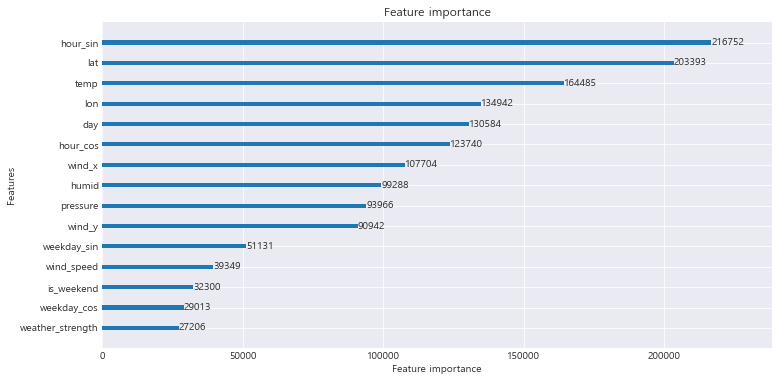

In [35]:
# 변수 중요성 파악
import lightgbm as lgb
lgb.plot_importance(lgbmr_final, figsize=(12,6))

- gradient boosting regressor에서와는 다르게 시간이 좀 더 중요한 역할을 끼쳤음을 알 수 있다. 그러나 그 다음으로 lat이 있는 걸 보아 모델이 달라졌긴 하지만 그럼에도 여전히 lat은 중요한 feature임을 알 수 있다.
- 비의 정도가 택시 사용량에 큰 영향을 끼칠 것이라고 생각했으나, 예상과 다르게 오히려 기온이 더 중요함을 알 수 있었다.
  - weather_strength에 비의 정도?가 포함되는데 이 feature가 끼치는 정도가 제일 작은 걸로 봐서는 영향을 거의 안 미친다고 봐야

------

## Kfold & GridSeachCV 적용

### - *split train, test set*

In [47]:
# 지정해준 date를 기점으로 train과 test set을 split
# 새롭게 함수 정의 - 앞의 함수랑 다른 거임 !
def split_train_and_test(df, date):
    """
    Dataframe에서 train_df, test_df로 나눠주는 함수
    
    df : 시계열 데이터 프레임
    date : 기준점 날짜
    """
    train_df = df[df['day'] < date]
    test_df = df[df['day'] >= date]
    return train_df, test_df

In [50]:
# GridSearchCV를 적용하기 위해서 data의 수를 줄여보자 ..!

# 앞에서와 마찬가지로 24일을 기점으로 나눠주자!
train_df_new, test_df_new = split_train_and_test(df, 24)
# 그런 다음에 요일, 시간대별로 cnt를 평균낸 dataframe을 이용하고자
train_df_new = train_df_new.groupby(['day', 'hour_sin', 'hour_cos']).mean().reset_index()
test_df_new = test_df_new.groupby(['day', 'hour_sin', 'hour_cos']).mean().reset_index()

In [53]:
y_train_new = train_df_new.pop('cnt')
x_train_new = train_df_new.copy()

In [54]:
y_test_new = test_df_new.pop('cnt')
x_test_new = test_df_new.copy()

### - *hyperparameter tuning*

In [62]:
from sklearn.model_selection import KFold

# lightgbm 모델의 경우, 과적합 문제로 인해 데이터 수가 10000개 이상일 때 권장되고 있음
# 따라서 lightgbm 대신에 gbm regressor 모델을 사용하고자.

params = {'max_depth': [7, 10, 13],
          'learning_rate': [0.01, 0.05, 0.001]}

cv = KFold(n_splits=5)

gs = GridSearchCV(gbmr, params, cv=cv, scoring='neg_median_absolute_error')
gs.fit(x_train_new, y_train_new)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(random_state=1023),
             param_grid={'learning_rate': [0.01, 0.05, 0.001],
                         'max_depth': [7, 10, 13]},
             scoring='neg_median_absolute_error')

In [64]:
# 최적값 확인
print('best max_depth :', gs.best_params_['max_depth'])
print('best learning_rate :', gs.best_params_['learning_rate'])
print('best r2 score : %.3f' % gs.best_score_)

best max_depth : 7
best learning_rate : 0.05
best r2 score : -14.004


### - *모델 성능 평가*

In [65]:
# 성능 확인
regression_results(y_test_new, gs.predict(x_test_new))

MAE: 33.233
MSE: 3138.564
RMSE: 56.023
R2: 0.415
MAPE: 1.806
